In [1]:
import pandas as pd
import numpy as np
import re

data = pd.read_csv('properati.csv')

### **Nueva columna con nombres de provincia**
state_name + Buenos Aires agrupado

In [2]:
pattern = '(Bs.As.)|(Buenos Aires)'
regex = re.compile(pattern)
buenos_aires = data.state_name.apply(lambda state: state if state is np.NaN else regex.search(state))

data['provincia'] = data.loc[:,'state_name']

data.loc[buenos_aires.notnull(),'provincia'] = 'Buenos Aires'
data.loc[:,'provincia'].value_counts()

Buenos Aires           61131
Capital Federal        32316
Córdoba                12069
Santa Fe               10172
Río Negro                808
Neuquén                  733
Mendoza                  681
Tucumán                  674
Corrientes               583
Misiones                 464
Entre Ríos               369
Salta                    278
Chubut                   259
San Luis                 252
La Pampa                 157
Formosa                   65
Chaco                     57
San Juan                  40
Tierra Del Fuego          31
Catamarca                 27
Jujuy                     26
Santa Cruz                20
La Rioja                   4
Santiago Del Estero        4
Name: provincia, dtype: int64

### **Regiones**

In [3]:
regiones = {'Capital Federal':'Pampeana'
,'Buenos Aires':'Pampeana'
,'Santa Fe':'Central'
,'Entre Ríos':'Mesopotamica'
,'Córdoba':'Central'
,'Misiones':'Mesopotamica'
,'Salta':'Noroeste'
,'Neuquén':'Patagonica'
,'Río Negro':'Patagonica'
,'San Luis':'Cuyo'
,'Mendoza':'Cuyo'
,'Corrientes':'Mesopotamica'
,'Chubut':'Patagonica'
,'Tucumán':'Noroeste'
,'La Pampa':'Pampeana'
,'Chaco':'Noreste'
,'San Juan':'Cuyo'
,'Santa Cruz':'Patagonica'
,'Tierra Del Fuego':'Patagonica'
,'Catamarca':'Noroeste'
,'Santiago Del Estero':'Noroeste'
,'Jujuy':'Noroeste'
,'La Rioja':'Noroeste'
,'Formosa':'Noreste'}

In [4]:
#data['regiones'] = data.state_name\
    #.apply(lambda state: regiones[state] if state in regiones.keys())
    
data['region'] = data.provincia.apply(lambda state: regiones[state] if state in regiones.keys() else np.NaN)
data['region'].value_counts()

Pampeana        93604
Central         22241
Patagonica       1851
Mesopotamica     1416
Noroeste         1013
Cuyo              973
Noreste           122
Name: region, dtype: int64

### **Barrios Porteños y sub-distritos**

In [5]:
# total de registros en 'Capital Federal'
data.loc[data.state_name == 'Capital Federal','state_name'].count()

32316

In [6]:
# DATA SET CON BARRIOS PORTEÑOS: barrios_zonas_capital

# total de distritos de place_name incluidos en state_name == 'Capital Federal'

lista_barrios = list(data.loc[data.state_name == 'Capital Federal','place_name'].unique())
mask_barrios_zonas = data.loc[:,'place_name'].apply(lambda distrito: distrito in lista_barrios)

print(len(lista_barrios))

62


In [7]:
barrios_zonas_capital = data.loc[(data.state_name == 'Capital Federal') & mask_barrios_zonas, :]

print(barrios_zonas_capital.shape[0], data.loc[data.state_name == 'Capital Federal','place_name'].shape[0] )

32316 32316


### **Capitales de Provincia** (excluída Capital Federal)

In [8]:
# lista de capitales, exluída capital federal

capitales = ['La Plata','San Fernando del Valle de Catamarca','Resistencia','Rawson','Córdoba','Corrientes','Paraná','Formosa','San Salvador de Jujuy','Santa Rosa','La Rioja','Mendoza','Posadas','Neuquén','Viedma','Salta','San Juan','San Luis','Río Gallegos','Santa Fe','Santiago del Estero','Ushuaia','San Miguel de Tucumán']
len(capitales), 'Capital Federal' in capitales

(23, False)

In [9]:
# DATA SET CON CAPITALES DE PROVINCIA: capitales_provincia

# la máscara se hace con place_name (no con state_name)
# para no confundir nombre de ciudad con nombre de provincia

mascara_capitales = data.place_name.apply(lambda place: place in capitales)

capitales_provincia = data.loc[mascara_capitales]

capitales_provincia.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,provincia,region
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,Buenos Aires,Pampeana
10,10,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4200833,-64.1887761",-31.420083,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boy_venta_casa_c...,"Hermosa casa sin terminar de 3 dormitorios, ba...",Casa sin terminar en Falda de Cañete. ...,https://thumbs4.properati.com/3/mQkhIxXpTTbMSc...,Córdoba,Central
32,32,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4053736,-64.1562667",-31.405374,...,11000.0,NaN,3.0,NaN,http://www.properati.com.ar/15bry_venta_depart...,"EN VENTA, departamento ubicado en barrio Pueyr...",Departamento apto crédito! Barrio Pueyrredon,https://thumbs4.properati.com/0/VUXj3pHJP7wl8p...,Córdoba,Central


### **Capitales + Capital**

In [10]:
import copy
capitales_mas_capital = copy.deepcopy(capitales)

capitales_mas_capital.insert(0,'Capital Federal')

print(len(capitales_mas_capital))

24


### **Interior Provincial** (provincias sin capitales)

In [11]:
# nueva lista de capitales con 'Capital Federal' para luego
# excluir del DF barrios porteños

mascara_interior_provincial = data.place_name\
    .apply(lambda place: place not in capitales_mas_capital)

In [12]:
# DATA SET CON MUNICIPIOS/DEPARTAMENTOS DE PROVINCIA: interior_provincial

# excluyo a los place name que no se corresponden a las capitales
# de provincia, más los place name incluidos en "Capital Federal"

interior_provincial = data.loc[(data.state_name != 'Capital Federal') & mascara_interior_provincial,]

interior_provincial.loc[:,['place_name','place_with_parent_names','state_name']].head()

,place_name,place_with_parent_names,state_name
4,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica
5,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Entre Ríos
6,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte
9,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe
11,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Bs.As. G.B.A. Zona Norte


### Interior de Buenos Aires

In [13]:
interior_bsas = data.loc[(data.provincia == 'Buenos Aires'), 'place_name']
len(interior_bsas.unique())

648

### **Conteo de nulos por distrito**
#### (columnas: price, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2)

In [14]:
# NULOS TOTALES

# porcentual de nulos totales en columnas de precio
print('Precios/monedas:')
print(data.currency.isnull().sum()/ data.shape[0])
print(data.price.isnull().sum() / data.shape[0])
print(data.price_aprox_local_currency.isnull().sum() / data.shape[0])
print(data.price_aprox_usd.isnull().sum() / data.shape[0],'\n')

# porcentual de nulos totales en columnas de superficie
print('Superficies:')
print(data.surface_total_in_m2.isnull().sum() / data.shape[0])
print(data.surface_covered_in_m2.isnull().sum() / data.shape[0])
print(data.rooms.isnull().sum() / data.shape[0],'\n')

# porcentual de nulos totales en columna price_usd_per_m2
print('Superficies + precios:')
print(data.price_usd_per_m2.isnull().sum() / data.shape[0])

Precios/monedas:
0.16837980531265467
0.1683715558488698
0.1683715558488698
0.1683715558488698 

Superficies:
0.3244349117307375
0.16422207556508828
0.6090579112357697 

Superficies + precios:
0.43394654347467415


In [15]:
# Porcentual de datos cargados en 'price' por distrito: provincia

data.groupby('provincia')['price_aprox_usd','surface_covered_in_m2']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(by='price_aprox_usd', ascending=False)

C:\Users\Foolface\.conda\envs\dh\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,price_aprox_usd,surface_covered_in_m2
provincia,,
Tierra Del Fuego,100.000000,83.870968
Catamarca,96.296296,77.777778
Santa Cruz,95.000000,50.000000
Capital Federal,89.794529,92.762099
Buenos Aires,88.905792,85.035416
San Luis,82.539683,73.412698
Corrientes,80.617496,87.478559
Santiago Del Estero,75.000000,100.000000
Misiones,75.000000,55.387931


In [16]:
# Porcentual de datos cargados en 'price' por distrito: capitales de provincia

capitales_provincia.groupby('place_name')['price_aprox_usd','surface_covered_in_m2']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(by='price_aprox_usd', ascending=False)

C:\Users\Foolface\.conda\envs\dh\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,price_aprox_usd,surface_covered_in_m2
place_name,,
Río Gallegos,100.000000,0.000000
Ushuaia,100.000000,62.500000
San Luis,94.252874,59.770115
Viedma,81.818182,63.636364
Corrientes,80.000000,60.000000
Córdoba,74.735250,70.596499
Posadas,70.684932,58.356164
La Rioja,66.666667,66.666667
La Plata,66.416732,76.440410


In [17]:
# Porcentual de datos cargados en 'price' por distrito: barrios

barrios_zonas_capital.groupby('place_name')['price_aprox_usd','surface_covered_in_m2']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(by='price_aprox_usd', ascending=False)

C:\Users\Foolface\.conda\envs\dh\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,price_aprox_usd,surface_covered_in_m2
place_name,,
Palermo Viejo,100.000000,100.000000
Villa Soldati,100.000000,93.333333
Villa General Mitre,100.000000,97.916667
Parque Chas,100.000000,97.727273
Villa Real,100.000000,100.000000
...,...,...
Palermo Chico,82.327586,96.551724
Once,82.323232,80.808081
Palermo Soho,81.472081,91.370558


In [18]:
# Porcentual de datos cargados en price por distrito: region

data.groupby('region')['price_aprox_usd','surface_covered_in_m2']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(by='price_aprox_usd', ascending=False)

C:\Users\Foolface\.conda\envs\dh\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,price_aprox_usd,surface_covered_in_m2
region,,
Pampeana,89.101961,87.644759
Cuyo,70.709147,70.092497
Mesopotamica,66.949153,72.175141
Central,64.974596,71.867272
Noreste,53.278689,27.049180
Patagonica,48.568341,61.156132
Noroeste,35.143139,41.559724


### **Completitud por cuartiles**
#### Según distrito

In [19]:
# Completitud en precios por provincia

precios_provincia = data.groupby('provincia')['price_aprox_usd']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(ascending=False)

pd.qcut(precios_provincia,4)

provincia
Tierra Del Fuego        (81.098, 100.0]
Catamarca               (81.098, 100.0]
Santa Cruz              (81.098, 100.0]
Capital Federal         (81.098, 100.0]
Buenos Aires            (81.098, 100.0]
San Luis                (81.098, 100.0]
Corrientes             (63.239, 81.098]
Santiago Del Estero    (63.239, 81.098]
Misiones               (63.239, 81.098]
Córdoba                (63.239, 81.098]
Mendoza                (63.239, 81.098]
Chubut                 (63.239, 81.098]
Chaco                  (42.767, 63.239]
Santa Fe               (42.767, 63.239]
La Rioja               (42.767, 63.239]
Río Negro              (42.767, 63.239]
Formosa                (42.767, 63.239]
Neuquén                (42.767, 63.239]
Jujuy                   (9.999, 42.767]
Salta                   (9.999, 42.767]
Entre Ríos              (9.999, 42.767]
Tucumán                 (9.999, 42.767]
La Pampa                (9.999, 42.767]
San Juan                (9.999, 42.767]
Name: price_aprox_usd, dtype: 

In [20]:
# Completitud en precios por barrios porteños

precios_barrios = barrios_zonas_capital.groupby('place_name')['price_aprox_usd']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(ascending=False)

pd.qcut(precios_barrios,4)

place_name
Villa General Mitre     (96.129, 100.0]
Villa Real              (96.129, 100.0]
Palermo Viejo           (96.129, 100.0]
Parque Chas             (96.129, 100.0]
Villa Soldati           (96.129, 100.0]
                             ...       
Palermo Chico          (49.999, 89.633]
Once                   (49.999, 89.633]
Palermo Soho           (49.999, 89.633]
Capital Federal        (49.999, 89.633]
Catalinas              (49.999, 89.633]
Name: price_aprox_usd, Length: 62, dtype: category
Categories (4, interval[float64]): [(49.999, 89.633] < (89.633, 94.278] < (94.278, 96.129] < (96.129, 100.0]]

In [21]:
# Porcentual de datos cargados en 'price' por distrito: capitales de provincia

precios_capitales_provincia = capitales_provincia.groupby('place_name')['price_aprox_usd']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(ascending=False)

pd.qcut(precios_capitales_provincia,4)

place_name
Ushuaia                                 (73.723, 100.0]
Río Gallegos                            (73.723, 100.0]
San Luis                                (73.723, 100.0]
Viedma                                  (73.723, 100.0]
Corrientes                              (73.723, 100.0]
Córdoba                                 (73.723, 100.0]
Posadas                                (54.176, 73.723]
La Rioja                               (54.176, 73.723]
La Plata                               (54.176, 73.723]
Mendoza                                (54.176, 73.723]
Neuquén                                (54.176, 73.723]
Resistencia                            (41.883, 54.176]
San Fernando del Valle de Catamarca    (41.883, 54.176]
San Juan                               (41.883, 54.176]
Santa Fe                               (41.883, 54.176]
Formosa                                (41.883, 54.176]
Paraná                                 (12.499, 41.883]
Salta                                

### **Precios y Distritos**

In [22]:
# media de precios de departamento por barrio

barrios_zonas_capital_dptos = barrios_zonas_capital.loc[data.property_type == 'apartment',:]

np.around(barrios_zonas_capital_dptos.groupby('place_name')['price_aprox_usd'].describe(),2).sort_values(by='mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Puerto Madero,553.0,890788.01,684833.77,169000.00,390000.00,690000.00,1222000.00,4500000.0
Palermo Chico,172.0,880346.16,1080612.90,82500.00,345000.00,640000.00,952500.00,8500000.0
Catalinas,1.0,550000.00,NaN,550000.00,550000.00,550000.00,550000.00,550000.0
Recoleta,1329.0,398242.85,359684.46,28874.75,168948.00,295000.00,500000.00,3200000.0
San Cristobal,493.0,375677.03,346974.22,35000.00,92000.00,160000.00,800450.00,988721.0
Palermo Viejo,28.0,366473.77,276358.97,75000.00,124558.56,290000.00,502500.00,1050000.0
Boedo,764.0,362447.07,429226.67,30100.00,80367.90,243894.92,590225.00,6809000.0
Retiro,202.0,359212.61,345260.13,54000.00,130750.00,225000.00,478549.97,2200000.0
Nuñez,620.0,345815.48,623742.78,23000.00,135925.00,180000.00,290000.00,6000000.0


In [23]:
# media de precios de departamento por provincia

provincias_dptos = data.loc[data.property_type == 'apartment',:]

np.around(provincias_dptos.groupby('provincia')['price_aprox_usd'].describe(),2).sort_values(by='mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
provincia,,,,,,,,
Catamarca,12.0,1203333.33,363076.08,340000.00,1100000.00,1245000.00,1500000.00,1500000.0
San Juan,2.0,347671.12,356846.92,95342.25,221506.69,347671.12,473835.56,600000.0
Capital Federal,24154.0,245346.92,439774.43,5103.61,99012.50,145000.00,250000.00,46545445.0
Río Negro,151.0,200226.99,169673.12,16825.10,82100.00,128000.00,305377.50,800000.0
Salta,54.0,197347.72,539987.89,29163.51,49582.92,65943.46,99690.24,2850000.0
Chubut,23.0,162502.74,69225.98,25798.49,116083.68,160000.00,185000.00,315000.0
Corrientes,134.0,157638.35,106705.60,32000.00,100217.50,120000.00,195000.00,900000.0
San Luis,34.0,154421.27,279449.81,56083.67,73531.38,99678.64,113541.84,1700000.0
Buenos Aires,24605.0,153085.47,147402.73,5000.00,78000.00,115000.00,176116.00,2550000.0


In [24]:
# media de precios de departamentos en capitales de provincia (sin capital)

capitales_provincia_dptos = capitales_provincia.loc[data.property_type == 'apartment',:]

np.around(capitales_provincia_dptos.groupby('place_name')['price_aprox_usd'].describe(),2).sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Corrientes,3.0,380000.00,52915.03,320000.00,360000.00,400000.00,410000.00,420000.00
Salta,51.0,204855.12,554976.28,29163.51,49300.63,67390.70,98429.88,2850000.00
Ushuaia,5.0,176107.61,79243.04,92538.06,118000.00,150000.00,260000.00,260000.00
San Miguel de Tucumán,107.0,154633.01,363645.73,16719.77,70665.43,88976.75,115812.79,3300000.00
San Luis,28.0,153436.44,303668.44,66402.00,84781.38,99678.64,112500.00,1700000.00
Mendoza,76.0,149762.79,210331.75,33650.20,61692.04,75712.96,132500.00,1200000.00
Córdoba,4758.0,143553.69,233709.10,5047.53,62757.63,83256.22,115000.00,3200000.00
Neuquén,43.0,131071.83,75204.00,50475.30,81321.33,110000.00,150000.00,384397.52
Resistencia,7.0,119363.62,109528.24,28041.83,48512.38,70104.59,162687.10,315000.00


In [25]:
# media de precios de departamentos en interior de provincia

interior_provincial_dptos = interior_provincial.loc[data.property_type == 'apartment',:]

np.around(interior_provincial_dptos.groupby('place_name')['price_aprox_usd'].describe(),2).sort_values(by='count',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Mar del Plata,4181.0,111156.62,79719.78,9253.80,63935.39,85900.00,130000.00,1489000.0
Rosario,4140.0,130493.60,261753.87,4666.62,58887.86,75712.96,109924.00,4376078.0
Nordelta,1858.0,228157.22,117850.47,12843.16,151200.00,195000.00,271357.37,850000.0
Tigre,1322.0,169193.75,96813.04,7466.60,116350.00,135700.00,176825.00,1350000.0
Olivos,1010.0,269821.53,205355.67,66000.00,152050.00,225000.00,293450.00,2500000.0
Lomas de Zamora,778.0,143340.97,109944.01,17946.77,85000.00,110000.00,150000.00,1200000.0
Pilar,746.0,132965.13,74464.78,23000.00,80094.22,119000.00,168539.39,820000.0
Morón,694.0,160609.50,291229.69,20000.00,63000.00,77000.00,90000.00,2124000.0
Ramos Mejía,573.0,124210.08,114256.21,5159.69,77500.00,92000.00,130000.00,1750000.0


In [26]:
# media de precios de casas en interior de provincia

interior_provincial_casas = interior_provincial.loc[data.property_type == 'house',:]

np.around(interior_provincial_casas.groupby('place_name')['price'].describe(),2).sort_values(by='count',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Tigre,1696.0,425952.36,260335.02,30000.0,295000.0,360000.0,470000.0,3600000.0
Pilar,1262.0,431034.88,428512.49,22000.0,199000.0,300000.0,480000.0,3559500.0
Mar del Plata,1180.0,227678.12,320395.16,29000.0,119000.0,160000.0,250000.0,5000000.0
Nordelta,1019.0,766383.40,556806.50,107000.0,420000.0,570000.0,975000.0,6500000.0
Escobar,919.0,295541.89,214155.82,45000.0,200000.0,250000.0,330000.0,2400000.0
Ituzaingó,646.0,222711.30,497403.31,50000.0,120000.0,157500.0,235000.0,12000000.0
Benavidez,557.0,417511.31,258235.05,50000.0,275000.0,355000.0,480000.0,2000000.0
Martínez,552.0,550225.91,450040.81,80000.0,280000.0,400000.0,630000.0,2900000.0
Lomas de Zamora,551.0,255262.07,176413.26,44000.0,140000.0,200000.0,300000.0,1250000.0


In [27]:
# media de superficie cubierta de casas en interior de provincia

interior_provincial_casas = interior_provincial.loc[data.property_type == 'apartment',:]

np.around(interior_provincial_casas.groupby('place_name')['surface_covered_in_m2'].describe(),2).sort_values(by='count',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Rosario,5747.0,59.17,69.84,18.0,37.0,48.0,70.0,4650.0
Mar del Plata,3146.0,74.65,873.84,1.0,38.0,50.0,70.0,49000.0
Nordelta,2029.0,75.10,37.05,1.0,49.0,68.0,90.0,402.0
Tigre,1389.0,70.87,148.94,1.0,48.0,57.0,74.0,5426.0
Olivos,978.0,80.14,80.35,5.0,51.0,60.0,81.0,1112.0
Pilar,767.0,65.33,61.80,1.0,40.0,54.0,76.0,940.0
Morón,761.0,44.93,16.50,1.0,37.0,42.0,49.0,150.0
Lomas de Zamora,653.0,65.13,54.49,1.0,43.0,50.0,70.0,1000.0
Ramos Mejía,552.0,58.80,35.55,1.0,40.0,48.0,67.0,346.0


#### Tipo propiedad y distrito

In [67]:
zona_norte_bsas = data.loc[data.state_name == 'Bs.As. G.B.A. Zona Norte',]
san_isidro_san_fer = data.loc[(data.place_name == 'San Isidro') | (data.place_name == 'San Fernando'),]
inmuebles_san_isidro_san_fer = san_isidro_san_fer.loc[(zona_norte_bsas.property_type == 'apartment') | (zona_norte_bsas.property_type == 'house')]
inmuebles_san_isidro_san_fer.property_type.shape[0]

1491

In [55]:
san_isidro_san_fer.loc[(data.property_type == 'apartment') & (data.state_name == 'Bs.As. G.B.A. Zona Norte')].shape[0]

917

In [56]:
san_isidro_san_fer.loc[(data.property_type == 'house') & (data.state_name == 'Bs.As. G.B.A. Zona Norte')].shape[0]

574

In [71]:
inmuebles_san_isidro_san_fer.property_type
dummies_1 = pd.get_dummies(inmuebles_san_isidro_san_fer.property_type, drop_first = True, prefix='numcol')
dummies_1

,numcol_house
50,0
56,1
112,0
114,0
246,0
...,...
119454,0
119640,0
119676,1
121058,0


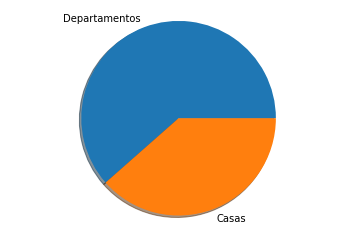

In [73]:
import matplotlib.pyplot as plt

labels = 'Departamentos', 'Casas'
sizes = [917, 574]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True)
ax1.axis('equal') 

plt.show()

In [45]:
caballito = barrios_zonas_capital.loc[data.place_name == 'Caballito',]

In [46]:
caballito.loc[(data.property_type == 'apartment') | (data.property_type == 'house')].shape[0]

2157

In [48]:
caballito.loc[(data.property_type == 'apartment')].shape[0]

2079

In [47]:
caballito.loc[(data.property_type == 'house')].shape[0]

78

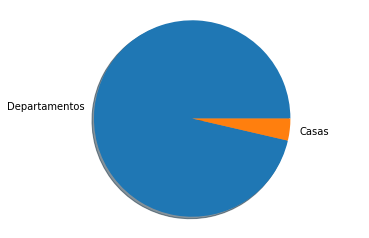

In [74]:
import matplotlib.pyplot as plt

labels = 'Departamentos', 'Casas'
sizes = [2079, 78]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True)
ax1.axis('equal') 

plt.show()

### **Correlaciones**

#### Barrios Porteños -> M2 cubiertos VS precio USD -> DEPARTAMENTOS
##### Todos los registros

In [ ]:
barrios_zonas_capital_dptos = barrios_zonas_capital.loc[data.property_type == 'apartment',:]

print('Total de filas:',barrios_zonas_capital_dptos.shape[0])
print('Total de filas de precios en usd sin depuración:',barrios_zonas_capital_dptos.price_aprox_usd.notnull().sum())

barrios_zonas_capital_dptos.loc[:,['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2']].corr(method='pearson')

In [ ]:
import seaborn as sns

corr = barrios_zonas_capital_dptos.loc[:,['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2']].corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### Registros vacíos ELIMINADOS

In [ ]:
precio_depurados = barrios_zonas_capital_dptos.price_aprox_usd.dropna(how= 'all')
m2_cubiertos_depurados =barrios_zonas_capital_dptos.surface_covered_in_m2.dropna(how= 'all')

print('Total de registros tras eliminación:',barrios_zonas_capital_dptos.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),'price_aprox_usd'].notnull().sum())

barrios_zonas_capital_dptos.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2']].corr(method='pearson')

In [ ]:
import seaborn as sns

corr = barrios_zonas_capital_dptos.loc[:,['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2']].corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Barrios Porteños -> M2 cubiertos VS precio USD -> CASAS

##### Total de registros

In [ ]:
barrios_zonas_capital_casas= barrios_zonas_capital.loc[data.property_type == 'house',:]

print('Total de filas:',barrios_zonas_capital_casas.shape[0])
print('Total de nulos en precios USD:',barrios_zonas_capital_casas.price_aprox_usd.isnull().sum())
print('Total de no nulos en precios USD:',barrios_zonas_capital_casas.loc[barrios_zonas_capital_casas.price_aprox_usd.notnull(),'price_aprox_usd'].notnull().sum())

barrios_zonas_capital_casas.loc[:,['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2']].corr(method='pearson')

In [ ]:
import seaborn as sns

corr = barrios_zonas_capital_casas.loc[:,['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2']].corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### Registros vacíos ELIMINADOS

In [ ]:
precio_depurados = barrios_zonas_capital_casas.price_aprox_usd.dropna(how= 'all')
m2_cubiertos_depurados = barrios_zonas_capital_casas.surface_covered_in_m2.dropna(how= 'all')

print('Total de registros tras eliminación',barrios_zonas_capital_casas.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),'price_aprox_usd'].notnull().sum())

barrios_zonas_capital_casas.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),['price_aprox_usd','surface_covered_in_m2']].corr(method='pearson')

In [ ]:
import seaborn as sns

corr = barrios_zonas_capital_casas.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2']].corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
barrios_zonas_capital_casas.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')


#### Capitales de Provincia -> M2 cubiertos VS precio USD -> DEPARTAMENTOS

##### Total de registros

In [ ]:
capitales_provincia_dptos = capitales_provincia.loc[data.property_type == 'apartment',:]

print('Total de registros\n',capitales_provincia_dptos.loc[:,['price_aprox_usd','surface_covered_in_m2']].notnull().sum(),sep='')

capitales_provincia_dptos.loc[:,['price_aprox_usd','surface_covered_in_m2']].corr(method='pearson')

In [ ]:
import seaborn as sns

corr = capitales_provincia_dptos.loc[:,['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
capitales_provincia_dptos.loc[:,['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')

##### Registros vacíos ELIMINADOS

In [ ]:
precio_depurados = capitales_provincia_dptos.price_aprox_usd.dropna(how= 'all')
m2_cubiertos_depurados = capitales_provincia_dptos.surface_covered_in_m2.dropna(how= 'all')

print('Total de registros (depurados)\n',capitales_provincia_dptos.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].notnull().sum(),sep='')

capitales_provincia_dptos.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')

In [ ]:
import seaborn as sns

corr = capitales_provincia_dptos.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
capitales_provincia_dptos.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')

#### Capitales de Provincia -> M2 cubiertos VS precio USD -> CASAS

##### Total de registros

In [ ]:
capitales_provincia_casas = capitales_provincia.loc[data.property_type == 'house',:]

print('Total de registros completados en precios USD:',capitales_provincia_casas.price_aprox_usd.notnull().sum())
print('Total de registros completados en m2:',capitales_provincia_casas.surface_covered_in_m2.notnull().sum())

capitales_provincia_casas.loc[:,['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')

In [ ]:
import seaborn as sns

corr = capitales_provincia_casas.loc[:,['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
capitales_provincia_casas.loc[:,['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')

##### Registros vacíos ELIMINADOS

In [ ]:
precio_depurados = capitales_provincia_casas.price_aprox_usd.dropna(how= 'all')
m2_cubiertos_depurados = capitales_provincia_casas.surface_covered_in_m2.dropna(how= 'all')

print('Registros tras depuración:',capitales_provincia_casas.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),'price_aprox_usd'].notnull().sum())

capitales_provincia_casas.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')

In [ ]:
import seaborn as sns

corr = capitales_provincia_casas.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
capitales_provincia_casas.loc[(precio_depurados.index) & (m2_cubiertos_depurados.index),['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].corr(method='pearson')

### Visualizaciones

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

#### Cantidad y Completitud de datos

##### Provincias

In [ ]:
precios_provincia = data.groupby('provincia')['price_aprox_usd']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))

In [ ]:
precios_provincia.sort_values(ascending=False)

In [ ]:
data.groupby('provincia')['price_aprox_usd'].count().sum()/data.price_aprox_usd.shape[0]

In [ ]:
n_bins = len(precios_provincia)
names = precios_provincia.index

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()

ax.bar(names,precios_provincia, edgecolor='black')

ax.set_xticklabels(names,rotation=45,rotation_mode="anchor", ha="right")

ax.set(xlabel = "Distritos", ylabel = "% completo en precio_usd", title = "Precios USD completos x Provincia")


plt.show()

In [ ]:
cant_precios_provincia = np.around(100*(data.groupby('provincia')['operation'].count() / data.shape[0]), 3)

In [ ]:
cant_precios_provincia.sort_values(ascending=False)

In [ ]:
n_bins = len(cant_precios_provincia)
names = cant_precios_provincia.index

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()

ax.bar(names,cant_precios_provincia, color='green', edgecolor='black')

ax.set_xticklabels(names,rotation=45,rotation_mode="anchor", ha="right")

ax.set(xlabel = "Distritos", ylabel = "% completo en precio_usd", title = "% Ventas x Provincia")


plt.show()

#### Regiones

In [ ]:
precios_regiones = data.groupby('region')['price_aprox_usd']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))
precios_regiones

In [ ]:
n_bins = len(precios_regiones)
names = precios_regiones.index

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()

ax.bar(names,precios_regiones, edgecolor='black', color='green')

ax.set_xticklabels(names,rotation=45,rotation_mode="anchor", ha="right")

ax.set(xlabel = "Distritos", title = "% Precios USD completos x Región")


plt.show()

In [ ]:
cant_precios_regiones = np.around(100*(data.groupby('region')['operation'].count() / data.shape[0]),2)
cant_precios_regiones

In [ ]:
n_bins = len(cant_precios_regiones)
names = cant_precios_regiones.index

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()

ax.bar(names,cant_precios_regiones, edgecolor='black', color = 'red')

ax.set_xticklabels(names,rotation=45,rotation_mode="anchor", ha="right")

ax.set(xlabel = "Distritos", ylabel = "% completo en precio_usd", title = "% Ventas x Región")

plt.show()

#### Barrios

In [ ]:
precios_barrios = barrios_zonas_capital.groupby('place_name')['price_aprox_usd']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))
precios_barrios.sort_values(ascending=False)

In [ ]:
n_bins = len(precios_barrios)
names = precios_barrios.index

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes()

ax.bar(names,precios_barrios, edgecolor='black', color = 'green')

ax.set_xticklabels(names,rotation=45,rotation_mode="anchor", ha="right")

ax.set(xlabel = "Distritos", title = "% Precios USD completos x Barrio")

plt.show()

In [ ]:
cant_precios_barrios = np.around(100*(barrios_zonas_capital.groupby('place_name')['operation'].count() / barrios_zonas_capital.shape[0]),2)
cant_precios_barrios.sort_values(ascending=False)

In [ ]:
n_bins = len(cant_precios_barrios)
names = cant_precios_barrios.index

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes()

ax.bar(names,cant_precios_barrios, edgecolor='black', color = 'red')

ax.set_xticklabels(names,rotation=45,rotation_mode="anchor", ha="right")

ax.set(xlabel = "Distritos", title = "% Ventas x Barrio")

plt.show()